In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X,y=make_blobs(random_state=0)

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

loreg=LogisticRegression().fit(X_train,y_train)
print("Test set score: {:.2f}".format(loreg.score(X_test,y_test)))

Test set score: 0.88


In [3]:
import mglearn

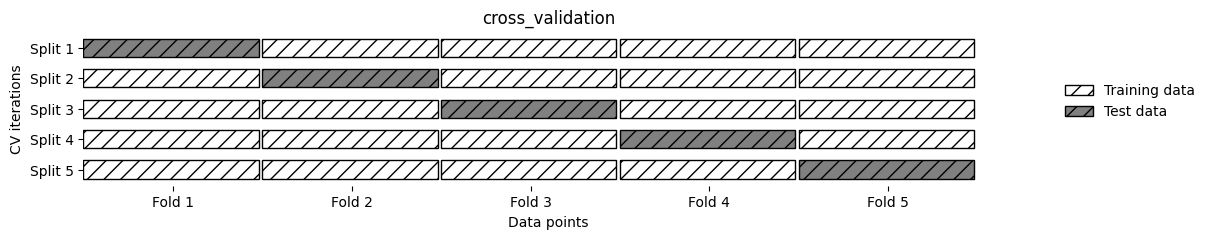

In [4]:
mglearn.plots.plot_cross_validation()

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
iris=load_iris()
loreg=LogisticRegression(max_iter=10000)

scores=cross_val_score(loreg,iris.data,iris.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [13]:
scores=cross_val_score(loreg,iris.data,iris.target,cv=5)
print('Cross-validation scores: {}'.format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [14]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.97


In [15]:
from sklearn.model_selection import cross_validate
res=cross_validate(loreg,iris.data,iris.target,cv=5,return_train_score=True)
display(res)

{'fit_time': array([0.0239017 , 0.02040529, 0.01330137, 0.0180428 , 0.01585197]),
 'score_time': array([0.00073528, 0.00043225, 0.00043321, 0.0004344 , 0.00068688]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [17]:
import pandas as pd
res_df = pd.DataFrame(res)
display(res_df)
print("Mean times and scores:\n", res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.023902,0.000735,0.966667,0.966667
1,0.020405,0.000432,1.000000,0.966667
2,0.013301,0.000433,0.933333,0.983333
3,0.018043,0.000434,0.966667,0.983333
4,0.015852,0.000687,1.000000,0.975000


Mean times and scores:
 fit_time       0.018301
score_time     0.000544
test_score     0.973333
train_score    0.975000
dtype: float64


### Stratified k-Fold Cross-Validation and Other Strategies

 In stratified cross-validation, we split the data such that the proportions between classes are the same in each fold as they are in the whole dataset

For example, if 90% of your samples belong to class A and 10% of your samples belong to class B, then stratified cross-validation ensures that in each fold, 90% of samples belong to class A and 10% of samples belong to class B.

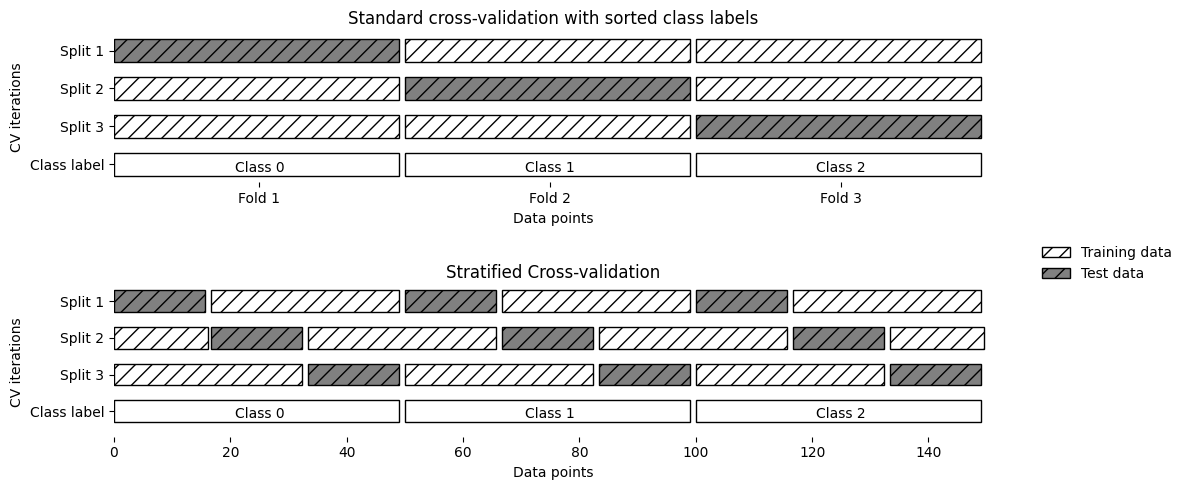

In [18]:
mglearn.plots.plot_stratified_cross_validation()

In [19]:
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5)


print("Cross-validation scores:\n{}".format(cross_val_score(loreg,iris.data,iris.target,cv=kfold)))

Cross-validation scores:
[1.         1.         0.86666667 0.93333333 0.83333333]


In [21]:
kfold = KFold(n_splits=3)
print("Cross-validation scores:\n{}".format(
    cross_val_score(loreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0. 0. 0.]


In [22]:
kfold=KFold(n_splits=3,shuffle=True,random_state=0)
print("Cross-validation scores:\n{}".format(
    cross_val_score(loreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0.98 0.96 0.96]


## Grid Search

In [25]:
from sklearn.svm import SVC

X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,random_state=0)

print("Size of the training set: {}  size of the test set: {}".format(X_train.shape[0],X_test.shape[0]))

best_score=0

for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm=SVC(gamma=gamma,C=C)
        svm.fit(X_train,y_train)
        score=svm.score(X_test,y_test)

        if score>best_score:
            best_score=score
            best_parameters={'C':C,'gamma':gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of the training set: 112  size of the test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}
